# kNN and Performance Measures


### kNN Recap

In the K-Nearest Neighbors algorithm, in order to classify a point, we measure the distance (e.g. Euclidean distance) to the nearest k instances of the training set, and let them vote. K is typically chosen to be an odd number.

![KNN](https://miro.medium.com/max/1300/0*Sk18h9op6uK9EpT8.)


### Example
We illustrate kNN with a simple synthetic data set.

In [2]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Customize plots
%matplotlib inline
sns.set_theme(style="white")
plt.style.use('grayscale')

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

The code below generates 16 points in the plane [0,1]. Points with low values of x1 and x2 are associated with class 0 and points with high values of x1 and x2 are associated with class 1.

In [3]:
# Create Data
data = {"x1":[0, 0.4, 0.15, 0.05, 0.4, 0.20, 0, 0.45, 1, 0.85, 0.9, 0.7, 0.65, 0.95, 1, 0.8],
"x2":[0.2, 0.35, 0, 0.10, 0.4, 0.25, 0.40, 0.35, 0.85, 0.95, 1, 0.65, 0.75, 0.9, 0.9, 0.95],
"y":[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]}

data = pd.DataFrame(data)
data

,x1,x2,y
0,0.00,0.20,0
1,0.40,0.35,0
2,0.15,0.00,0
3,0.05,0.10,0
4,0.40,0.40,0
5,0.20,0.25,0
6,0.00,0.40,0
7,0.45,0.35,0
8,1.00,0.85,1
9,0.85,0.95,1


We also have 3 new points for which we do not know the class.

We want to build a model to find out to which class (0 or 1) these 3 point belong to.

In [4]:
# New points
p = pd.DataFrame({"name":["p1", "p2", "p3"], "x1":[0.15, 0.75, 0.5],
"x2":[0.35, 0.8, 0.6]})
p

,name,x1,x2
0,p1,0.15,0.35
1,p2,0.75,0.80
2,p3,0.50,0.60


First we plot our dataset with the x1 values on the horizontal axis and the x2 values on the vertical axes. We color points according to the y target variable, which only takes values 0 (red) and 1 (blue).

The new points are marked by an orange x marker.

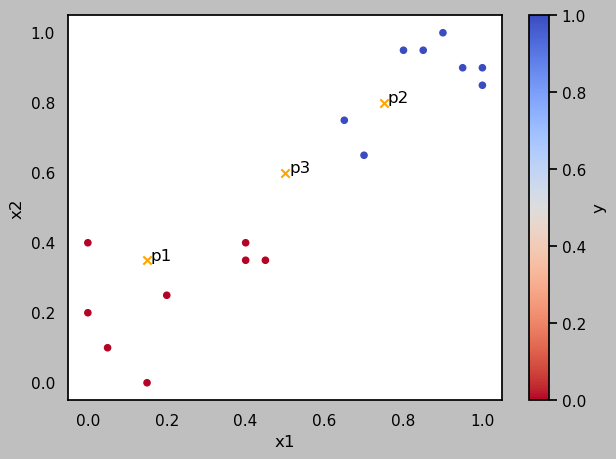

In [5]:
# Plot
data.plot.scatter("x1", "x2", c="y", colormap="coolwarm_r", figsize=(7, 5))
plt.scatter(p.x1, p.x2, c="orange", marker="x")
for point in p.values:
  plt.text(point[1]+0.01, point[2], point[0])

The two classes can be identified on the above scatter plot. In addition, p1 seems to belong to class 0, p2 to class 1. The class assignment for p3 is not so clear. 

Below we classify the new points using the kNN algorithm with different k (i.e. the number of neighboors we consider for the class voting when assigning a class). 

In [6]:
# Select X and y
X = data[["x1", "x2"]]
y = data["y"]

First build a simple model using the sklearn `KNeighborsClassifier`.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

Let's have a look at what parameters it used by default. We can check their meaning by looking the the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

* How many neighbors? `n_neighbors` this is the number of neighbors to use. The default is 5.  
* What similarity/distance measure to use? `p` set p=2  to use the Euclidean distance (L2) and p = 1 to use the Manhattan distance (l1)
* What weight to give to the different neighbors? `weights` use uniform if all points should be given equal weight, use distance if you want to weigh neighbors by the inverse of their distance.

In [8]:
knn

KNeighborsClassifier()

But let's now see what class kNN would predict for our 3 points with unknown labels for different values of k.

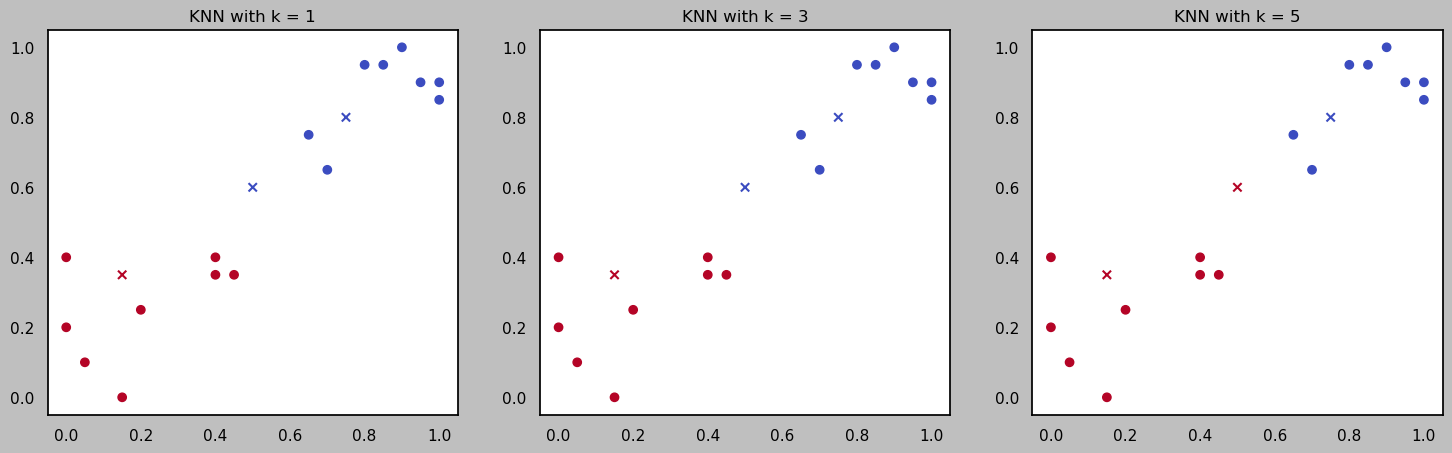

In [9]:
# KNN plot
fig, ax = plt.subplots(1, 3, figsize=(18,5))
i = 0
for k in [1, 3, 5]:
  model = KNeighborsClassifier(n_neighbors=k).fit(X,y)
  pred = model.predict(p[["x1", "x2"]])
  ax[i].scatter(data.x1, data.x2, c=data.y, cmap="coolwarm_r")
  ax[i].scatter(p.x1, p.x2, c=pred, cmap="coolwarm_r", marker="x")
  ax[i].set_title("KNN with k = " + str(k))
  i += 1

For k = 1 and k = 3, p3 belongs to class 0 while it belongs to class 1 for k = 5.

## Exercise: Diabetes Classification

We will work on the diabetes dataset that contains patient attributes (e.g. age, glucose, ...) and information on whether the patient is diagnosed with diabetes (0 meaning "no", 1 meaning "yes"). The goal is to learn a model that predicts whether a (new) patient has diabetes given based on their individual characteristics (the set of patient attributes). This is a classification task and you can use the kNN classifier.

#### 1. Model fitting and performance evaluation
Split the data into testsize 20% and trainsize 80% and perform classification using a k-NN classifier with k = 5.
Calculate accuracy, recall, precision and f1-score for your classifier and plot the confusion matrix 
to analyze the performance of the model.

accuracy: 0.7337662337662337
precision: 0.6458333333333334
average percision: 0.5198593073593074
recall: 0.5636363636363636
f1: 0.6019417475728155


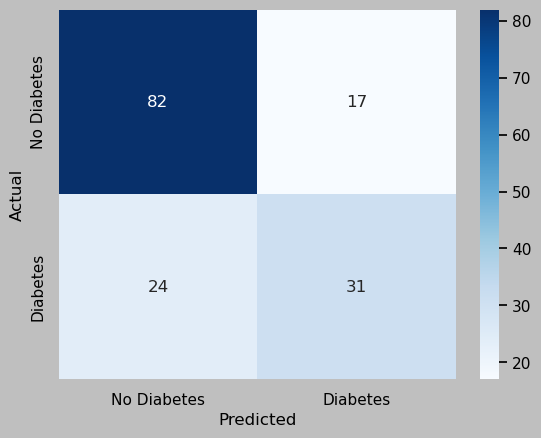

Confusion Matrix:
[[82 17]
 [24 31]]


In [10]:
# Import additional libraries
# data splitting
from sklearn.model_selection import train_test_split
# performance measures
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score,average_precision_score
# classifier
from sklearn.neighbors import KNeighborsClassifier
# set a random seed
np.random.seed(1)

# get data
df = pd.read_csv('DiabetesDataset.csv')
# print(df.info)
# keep the patient characteristics as inputs x and the diabetes as target y
x = df.drop(columns=['Diabetes'])
y = df['Diabetes'].values
labels = ["No Diabetes", "Diabetes"]

#### START YOUR SOLUTION HERE ####
# Split data into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit kNN model with k=5 to the training data
model = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

# Get predictions on test set
prediction = model.predict(x_test)

# Compute the performance measures listed in the text above
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
avg_precision = average_precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
confusion = confusion_matrix(y_test, prediction)
f1 = f1_score(y_test, prediction)

# Print the values of all performance measures except the confusion matrix 
print("accuracy:", accuracy)
print("precision:", precision)
print("average percision:", avg_precision)
print("recall:", recall)
print("f1:", f1)

# Display confusion matrix using a heatmap
sns.heatmap(confusion, annot=confusion, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Confusion Matrix:")
print(confusion)
#### END YOUR SOLUTION HERE ####


#### 2. Performance Curves
Compute the values necessary for plotting the area under the ROC and Precision-Recall curves and then plot and inspect the curves.

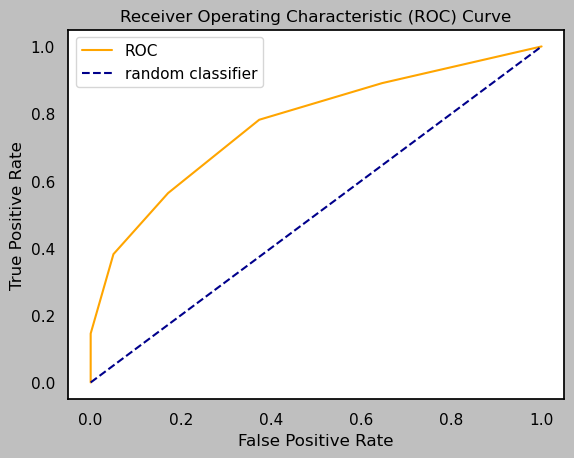

ROC AUC Score: 0.768870523415978


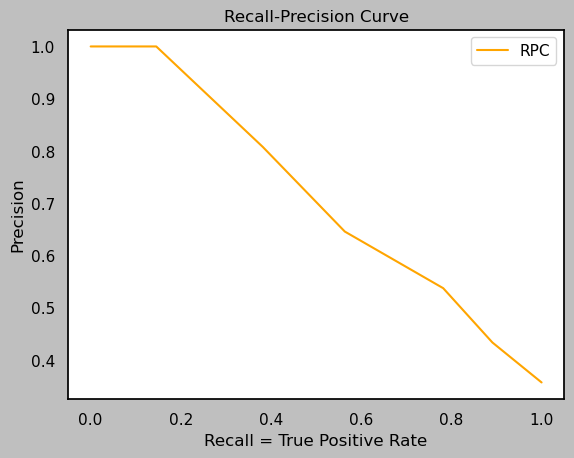

Average Percision: 0.6573265525035437


In [19]:
# Predict probabilities for the test set
probs = model.predict_proba(x_test)

# Keep the Probabilities of the positive class only
probs = probs[:, 1]

# Function for plotting the ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label = 'random classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Function for plotting the Precision-Recall curve
def plot_rpc(recall, precision):
    plt.plot(recall, precision, color='orange', label='RPC')
    plt.ylabel('Precision')
    plt.xlabel('Recall = True Positive Rate')
    plt.title('Recall-Precision Curve')
    plt.legend()
    plt.show()


#### START YOUR SOLUTION HERE ####
# Compute and plot ROC curve (check out the function roc_curve)
fpr, tpr, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Compute the Area Under the ROC Curve (AUC) - the ROC AUC score
roc_score = roc_auc_score(y_test, probs)
print(f"ROC AUC Score: {roc_score}")

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probs)
plot_rpc(recall, precision)

# Compute average precision - Precision-Recall AUC
avg_precision = average_precision_score(y_test, probs)
print(f"Average Percision: {avg_precision}")

#### END YOUR SOLUTION HERE ####

#### 3. Assignment: Different Values of k
Now fit two additional k-NN classifies to the same dataset with `k` values 1 and n (number of training samples), respectively. Compute the accuracies and plot the corresponding confusion matrix to analyze the prediction results for each model.

614
accuracy: 0.7207792207792207
precision: 0.6
average percision: 0.5161038961038961
recall: 0.6545454545454545
f1: 0.6260869565217392


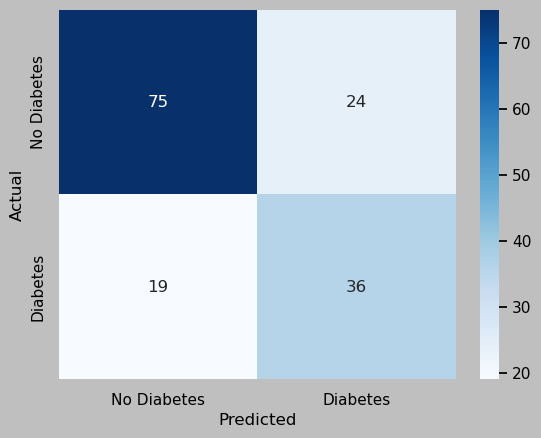

Confusion Matrix
[[75 24]
 [19 36]]
accuracy: 0.6428571428571429
precision: 0.0
average percision: 0.35714285714285715
recall: 0.0
f1: 0.0


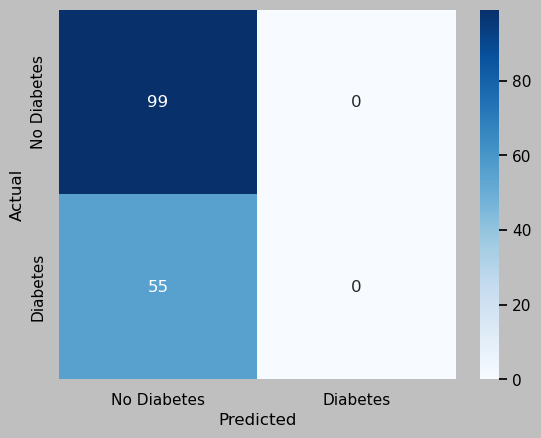

Confusion Matrix
[[99  0]
 [55  0]]


In [28]:
# Perform a k-NN on the given dataset and plot the confusion matrix
# compute number of samples
n = len(y_train)
print(n)
for k in [1, n]:
    #### START YOUR SOLUTION HERE ####
    # Fit a kNN classifier
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)

    # Compute the predictions on the test data using the trained model
    prediction = model.predict(x_test.values)

    # Compute accuracy
    # Compute the confusion matrix
    # Plot the confusion matrix using a heatmap
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    avg_precision = average_precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    confusion = confusion_matrix(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    print("accuracy:", accuracy)
    print("precision:", precision)
    print("average percision:", avg_precision)
    print("recall:", recall)
    print("f1:", f1)

    sns.heatmap(confusion, annot=confusion, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("Confusion Matrix")
    print(confusion)
    
    #### END YOUR SOLUTION HERE ####